# Topic Analysis over Time 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')
data.head()

,time,rating,free_text,do_better,surgery,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels
0,2023-07-13 15:28:00,Extremely likely,very friendly caring staff treated me with res...,NaN,Earls Court Surgery,positive,0.866406,neutral,0.000000,13,3,5.0,Overall Patient Satisfaction,NaN
1,2023-07-13 15:29:00,Extremely likely,so good so confidential,NaN,Earls Court Surgery,positive,0.925523,neutral,0.000000,4,0,5.0,Patient Privacy and Confidentiality,NaN
2,2023-07-13 15:29:00,Extremely likely,the doctor was very understanding and very kno...,NaN,Earls Court Surgery,positive,0.968350,neutral,0.000000,8,5,5.0,Medical Staff Competence,NaN
3,2023-07-13 15:30:00,Extremely likely,dr e was extremely nice,NaN,Earls Court Surgery,positive,0.975969,neutral,0.000000,5,5,5.0,Patient-Doctor Communication,NaN
4,2023-07-13 15:31:00,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything,Earls Court Surgery,neutral,0.765828,positive,0.830731,45,6,5.0,Follow-Up and Continuity of Care,Overall Patient Satisfaction


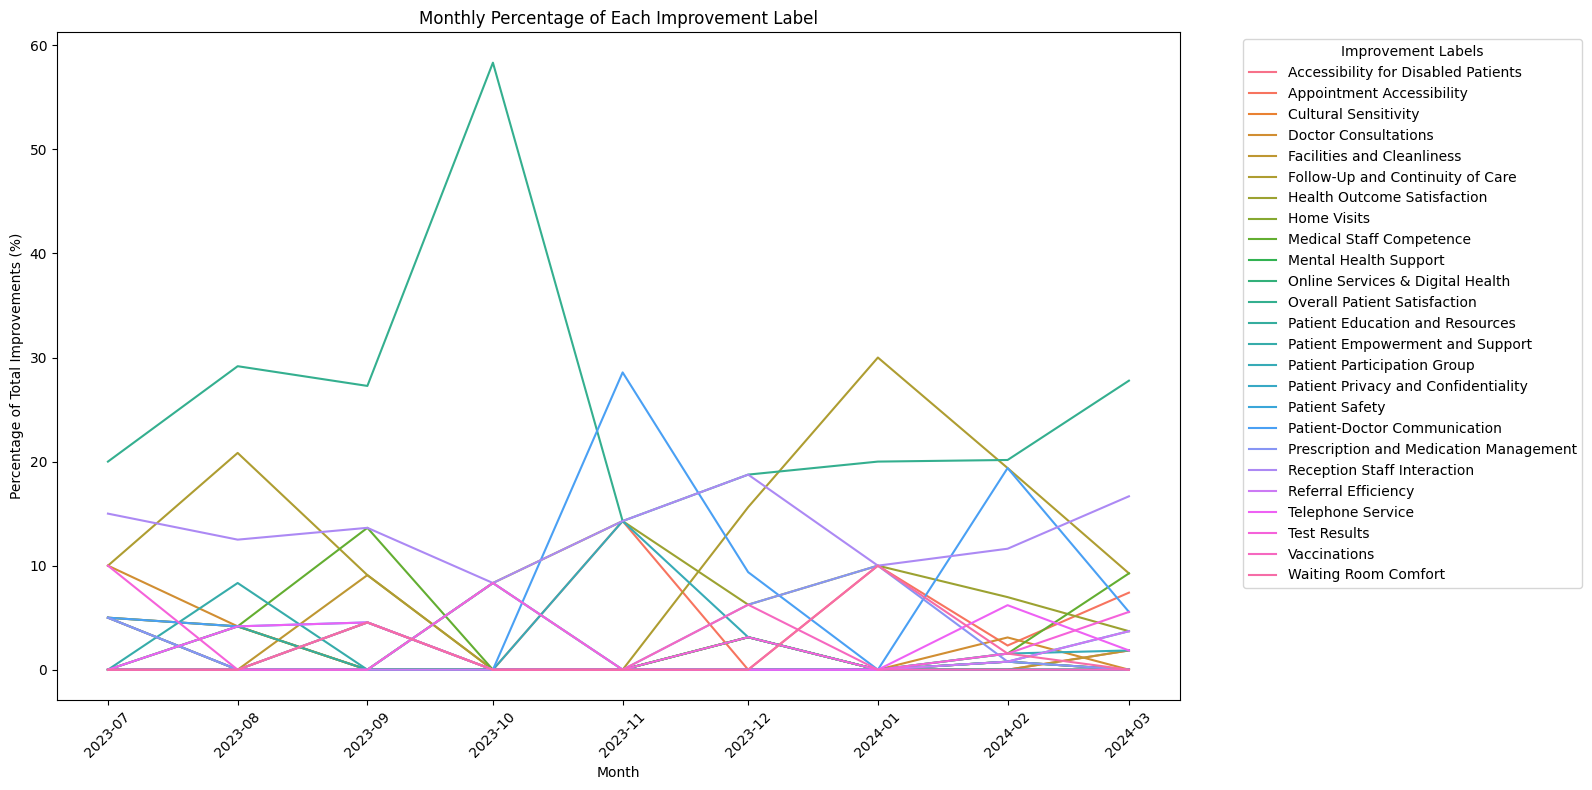

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame loaded as before

# Set the 'time' column to datetime and index it
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Group by month and 'improvement_labels', counting occurrences
data.index = data.index.to_period('M')
monthly_improvement_counts = data.groupby([data.index, 'improvement_labels']).size().unstack(fill_value=0)

# Calculate the percentage of each label for each month
monthly_improvement_percentages = monthly_improvement_counts.div(monthly_improvement_counts.sum(axis=1), axis=0) * 100

# Convert the period index back to timestamp for plotting
monthly_improvement_percentages.index = monthly_improvement_percentages.index.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_improvement_percentages, dashes=False)
plt.title('Monthly Percentage of Each Improvement Label')
plt.ylabel('Percentage of Total Improvements (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Improvement Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()